In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### To actually edit the original DataFrame, we set the “inplace” parameter to True, and there is no returned value

In [4]:
df.drop("Unnamed: 32", axis=1, inplace=True)

In [5]:
df.drop('id',axis=1, inplace=True)

# The diagnosis of breast tissues (M = malignant, B = benign)

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df["diagnosis"]= df["diagnosis"].map({"M":1,"B":0})

In [8]:
df.diagnosis.unique()

array([1, 0])

Text(0.5, 1.0, 'Diagnosis (M=1 , B=0)')

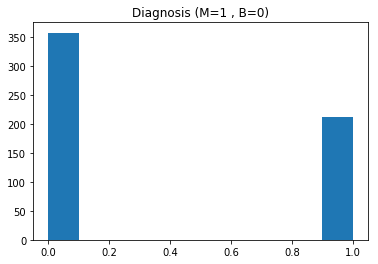

In [9]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')

In [10]:
len(df[df.diagnosis==1])

212

In [11]:
len(df[df.diagnosis==0])

357

In [12]:
features=list(df.columns)      

In [14]:
features.remove("diagnosis")

In [16]:
X = df[features]

In [18]:
y=df['diagnosis']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

# Feature importance chart

[0.0120344  0.03616943 0.05800664 0.03081323 0.0073856  0.05127754
 0.06658628 0.02985182 0.00763472 0.0096025  0.02139045 0.00363011
 0.02828033 0.01497088 0.00518444 0.00744691 0.00326597 0.00696303
 0.00513087 0.00495534 0.07447901 0.01727142 0.08895341 0.09998865
 0.01923785 0.0091063  0.05306015 0.20006495 0.01405872 0.01319903]


/home/helmi/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


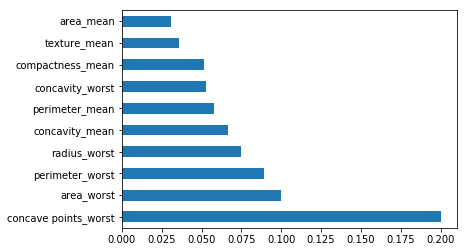

In [20]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


In [31]:
estimator = DecisionTreeClassifier(max_depth=2)
estimator.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

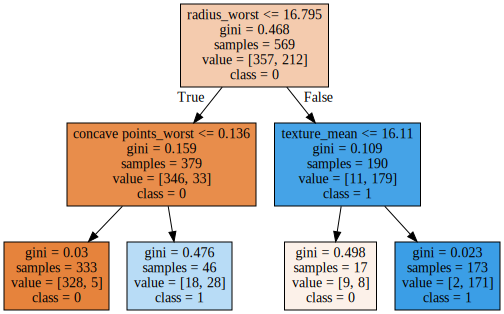

In [39]:
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=features, class_names=['0','1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [77]:
df[ ( df["concave points_worst"]<=0.136 )& ( df.diagnosis== 0) ].shape

(337, 31)

In [75]:
df.shape

(569, 31)